In [2]:
import pandas as pd
import numpy as np
import time
import smtplib
from matplotlib import style
import seaborn as sns
sns.set(style='ticks', palette='RdBu')
import pandas as pd
import numpy as np
import time
import datetime 
%matplotlib inline
import matplotlib.pyplot as plt
from subprocess import check_output
pd.options.display.max_colwidth = 1000
from time import gmtime, strftime
Time_now = strftime("%Y-%m-%d %H:%M:%S", gmtime())
import timeit
start = timeit.default_timer()
pd.options.display.max_rows = 100
#from wordcloud import WordCloud
import sqlite3
import nltk
import string
from nltk.corpus import stopwords
import re
from bs4 import BeautifulSoup
from nltk.stem.porter import PorterStemmer
english_stemmer=nltk.stem.SnowballStemmer('english')
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import SGDClassifier, SGDRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import random
import itertools
import sys
import os
import argparse
from sklearn.pipeline import Pipeline
from scipy.sparse import csr_matrix
from sklearn.feature_extraction.text import CountVectorizer
import six
from abc import ABCMeta
from scipy import sparse
from scipy.sparse import issparse
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.utils import check_X_y, check_array
from sklearn.utils.extmath import safe_sparse_dot
from sklearn.preprocessing import normalize, binarize, LabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFECV, SelectKBest
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn import svm
from scipy.stats import skew
from scipy.stats.stats import pearsonr
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier

In [3]:
data = pd.read_csv('amazon_phone_filtered.csv', encoding='utf-8')
df = data
df.head().T

,0,1,2,3,4
Price,107.98,107.98,107.98,107.98,107.98
Rating,5,5,1,1,5
Review_Votes,0,0,1,0,0
Brand_Name,apple,apple,apple,apple,apple
Product_Name,apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint)
Reviews_text,amazing value,"i received my phone a lot quicker than expected i am extremely happy with it, the personal touch of the note accompanying my phone was a nice touch!",i'm pissed i'll never order a phone from amazon again the phone came with no sim card which was not a problem i bought one and attempted to activate it the phone receives no texts or calls it does not function at all ! honestly was a waste of my money it will not happen again,*buyer beware*this company never refunded me money back for a phone that was sent to me that powered on one time i took it to the sprint store and i was told the phone was never a sprint phone and you could hear the juggling when you sat it down like something was loose on the inside i ended up buying a new phone from sprint while i was there don't waste your money or time from this company i purchased new phones for my son and daughter from another company and those phones worked fine,works great
length_reviews,13,149,277,496,11


In [4]:
#Print the columns in data
for i in data.columns:
    print(i)

Price
Rating
Review_Votes
Brand_Name
Product_Name
Reviews_text
length_reviews


In [5]:
data.isnull().sum()

Price                0
Rating               0
Review_Votes      1173
Brand_Name           0
Product_Name         0
Reviews_text         5
length_reviews       0
dtype: int64

In [6]:
df['Price'] = df['Price'].fillna(0)
df['Review_Votes'] = df['Review_Votes'].fillna(0)
df['Reviews_text'] = df['Reviews_text'].fillna('NaN')

data.describe()

,Price,Rating,Review_Votes,length_reviews
count,38299.000000,38299.000000,38299.000000,38299.000000
mean,589.828502,4.032742,1.834722,178.026894
std,501.561398,1.478102,12.894513,437.151480
min,104.990000,1.000000,0.000000,1.000000
25%,242.990000,4.000000,0.000000,20.000000
50%,505.990000,5.000000,0.000000,64.000000
75%,649.990000,5.000000,1.000000,179.000000
max,2408.730000,5.000000,524.000000,10615.000000


In [7]:
data.dtypes


Price             float64
Rating              int64
Review_Votes      float64
Brand_Name         object
Product_Name       object
Reviews_text       object
length_reviews      int64
dtype: object

In [8]:
#Categorical Variables - object dtype
categorical = data.select_dtypes(include=['object']).columns.values
categorical

array(['Brand_Name', 'Product_Name', 'Reviews_text'], dtype=object)

In [9]:
#Numerical Variables- int and float dtype
numerical = data.select_dtypes(include = ['float64', 'int64']).columns.values
numerical

array(['Price', 'Rating', 'Review_Votes', 'length_reviews'], dtype=object)

In [10]:
data.isnull().sum()

Price             0
Rating            0
Review_Votes      0
Brand_Name        0
Product_Name      0
Reviews_text      0
length_reviews    0
dtype: int64

In [11]:
data.head(5)

,Price,Rating,Review_Votes,Brand_Name,Product_Name,Reviews_text,length_reviews
0,107.98,5,0.0,apple,apple iphone 6 plus gold 128 gb (sprint),amazing value,13
1,107.98,5,0.0,apple,apple iphone 6 plus gold 128 gb (sprint),"i received my phone a lot quicker than expected i am extremely happy with it, the personal touch of the note accompanying my phone was a nice touch!",149
2,107.98,1,1.0,apple,apple iphone 6 plus gold 128 gb (sprint),i'm pissed i'll never order a phone from amazon again the phone came with no sim card which was not a problem i bought one and attempted to activate it the phone receives no texts or calls it does not function at all ! honestly was a waste of my money it will not happen again,277
3,107.98,1,0.0,apple,apple iphone 6 plus gold 128 gb (sprint),*buyer beware*this company never refunded me money back for a phone that was sent to me that powered on one time i took it to the sprint store and i was told the phone was never a sprint phone and you could hear the juggling when you sat it down like something was loose on the inside i ended up buying a new phone from sprint while i was there don't waste your money or time from this company i purchased new phones for my son and daughter from another company and those phones worked fine,496
4,107.98,5,0.0,apple,apple iphone 6 plus gold 128 gb (sprint),works great,11


In [12]:
rev = data['Reviews_text']
rev

0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  amazi

In [13]:
#Total lnumber of reviews
len(rev)

38299

In [14]:
#Number of reviews with brand- Top 10 (Convert them to upper case)
brand_rev = data['Brand_Name'].str.upper()
brand_rev.value_counts().head(10)

APPLE         15306
SAMSUNG       11034
BLU            7199
HTC            2789
LG             1633
BLACKBERRY      319
XIAOMI           19
Name: Brand_Name, dtype: int64

In [15]:
# Ratings
Customer_Ratings = data.groupby('Brand_Name').Rating.agg(['count', 'min', 'max']).sort_values('count', ascending=False)
Customer_Ratings.head(15).T


Brand_Name,apple,samsung,blu,htc,lg,blackberry,xiaomi
count,15306,11034,7199,2789,1633,319,19
min,1,1,1,1,1,1,1
max,5,5,5,5,5,5,5


In [16]:
#Let us take top 5 brands 
top_5_brands = data[data['Brand_Name'].isin(['samsung','blu','apple','lg','blackberry','htc'])]
top_5_brands.head(5).T

,0,1,2,3,4
Price,107.98,107.98,107.98,107.98,107.98
Rating,5,5,1,1,5
Review_Votes,0,0,1,0,0
Brand_Name,apple,apple,apple,apple,apple
Product_Name,apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint)
Reviews_text,amazing value,"i received my phone a lot quicker than expected i am extremely happy with it, the personal touch of the note accompanying my phone was a nice touch!",i'm pissed i'll never order a phone from amazon again the phone came with no sim card which was not a problem i bought one and attempted to activate it the phone receives no texts or calls it does not function at all ! honestly was a waste of my money it will not happen again,*buyer beware*this company never refunded me money back for a phone that was sent to me that powered on one time i took it to the sprint store and i was told the phone was never a sprint phone and you could hear the juggling when you sat it down like something was loose on the inside i ended up buying a new phone from sprint while i was there don't waste your money or time from this company i purchased new phones for my son and daughter from another company and those phones worked fine,works great
length_reviews,13,149,277,496,11


In [17]:
#Let us take top 5 brands 
samsung = data[data['Brand_Name'].isin(['samsung'])]
lg = data[data['Brand_Name'].isin(['lg'])]
blackberry = data[data['Brand_Name'].isin(['blackberry'])]
blu = data[data['Brand_Name'].isin(['blu'])]
apple = data[data['Brand_Name'].isin(['apple'])]
htc = data[data['Brand_Name'].isin(['htc'])]
apple.head(5).T

,0,1,2,3,4
Price,107.98,107.98,107.98,107.98,107.98
Rating,5,5,1,1,5
Review_Votes,0,0,1,0,0
Brand_Name,apple,apple,apple,apple,apple
Product_Name,apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint)
Reviews_text,amazing value,"i received my phone a lot quicker than expected i am extremely happy with it, the personal touch of the note accompanying my phone was a nice touch!",i'm pissed i'll never order a phone from amazon again the phone came with no sim card which was not a problem i bought one and attempted to activate it the phone receives no texts or calls it does not function at all ! honestly was a waste of my money it will not happen again,*buyer beware*this company never refunded me money back for a phone that was sent to me that powered on one time i took it to the sprint store and i was told the phone was never a sprint phone and you could hear the juggling when you sat it down like something was loose on the inside i ended up buying a new phone from sprint while i was there don't waste your money or time from this company i purchased new phones for my son and daughter from another company and those phones worked fine,works great
length_reviews,13,149,277,496,11


In [18]:
#Size of the data now
len(top_5_brands.Reviews_text)

38280

In [19]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sentiment = SentimentIntensityAnalyzer()
  

C:\Users\Sri Lakshmi\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [20]:
top_5_brands.Reviews_text.unique()

array(['amazing value',
       'i received my phone a lot quicker than expected i am extremely happy with it, the personal touch of the note accompanying my phone was a nice touch!',
       "i'm pissed i'll never order a phone from amazon again the phone came with no sim card which was not a problem i bought one and attempted to activate it the phone receives no texts or calls it does not function at all ! honestly was a waste of my money it will not happen again",
       ...,
       "i have loved blackberry since my first bold. i really liked the q10 and the classic but the priv has my heart forever! the display is large and the graphics display beautifully. the use of the android apps makes me happy to be able to choose from my favorites that i went without for years. the sliding qwerty blackberry keyboard is perfectly placed and while the touch keyboard is excellent; i am very happy to have the buttons to press. the addition of google's apps is convenient and i am pleased with the c

In [21]:
#top_5_brands.to_csv("top_5_brands_new.csv")

In [106]:
sample= top_5_brands.Reviews_text[:100]
def my_func():
    """
    this function return some value
    :return:
    """
    for sentences in sample:
        sentences
        ss = sentiment.polarity_scores(sentences)
        for k in sorted(ss):
            return k, ss[k]

def write_file(data):
    """
    this function write data to file
    :param data:
    :return:
    """
    file_name = 'output.txt'
    with open(file_name, 'w') as x_file:
        x_file.write('{} '.format(data))


def run():
    data = my_func()
    write_file(data)


run()




In [24]:
#data_5= pd.read_csv("top_5_brands_cleaned.csv",encoding='cp850')

In [108]:
#data_5.Reviews.describe()
data_5=top_5_brands

In [109]:
data_5.loc[:, data_5.dtypes == object] = data_5.loc[:, data_5.dtypes == object].fillna('')


C:\Users\Sri Lakshmi\Anaconda3\lib\site-packages\pandas\core\indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import re

In [112]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))
def remove_stopword(word):
    return word not in words

from nltk.stem import WordNetLemmatizer
Lemma = WordNetLemmatizer()

from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

data_5['NewReviews'] = data_5['Reviews_text'].str.lower().str.split()
data_5['NewReviews'] = data_5['NewReviews'].apply(lambda x : [item for item in x if item not in stop])


C:\Users\Sri Lakshmi\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Sri Lakshmi\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [113]:
data_5.NewReviews

0                                         [amazing, value]
1        [received, phone, lot, quicker, expected, extr...
2        [i'm, pissed, i'll, never, order, phone, amazo...
3        [*buyer, beware*this, company, never, refunded...
4                                           [works, great]
5                            [excellent, condition,, like]
6                                                   [good]
7               [im, love, phone, ,, excellent, condition]
8          [sometimes, keys, buttons, don't, work, screen]
9                                                  [good!]
10       [great, price, quick, delivery, sealed, brand,...
11       [great, product!, although, small, problem, se...
12       [described, seller, great, phone, work's, grea...
13       [bought, phone, brand, newwhich, way, cheaper,...
14       [phone, still, connected, previous, owners, ac...
15       [guys, awesome!, order, phone, one, 4th, recei...
16       [scratches, sure, used, refurbished, pretty, s.

In [114]:
#Cleaned data to csv
data_5['Cleaned_reviews'] = [' '.join([WordNetLemmatizer().lemmatize(re.sub('[^A-Za-z]', ' ', line))
for line in lists]).strip() for lists in data_5['NewReviews']] 

C:\Users\Sri Lakshmi\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [115]:
data_5.Cleaned_reviews

0                                            amazing value
1        received phone lot quicker expected extremely ...
2        i m pissed i ll never order phone amazon phone...
3        buyer beware this company never refunded money...
4                                               work great
5                                excellent condition  like
6                                                     good
7                      im love phone   excellent condition
8                   sometimes key button don t work screen
9                                                     good
10       great price quick delivery sealed brand new pr...
11       great product  although small problem seller a...
12       described seller great phone work s great than...
13       bought phone brand newwhich way cheaper retail...
14       phone still connected previous owner account c...
15       guy awesome  order phone one  th received  th ...
16       scratch sure used refurbished pretty sure used.

In [116]:
data_5.to_csv("Top brands_filtered_new column after stop word removal.csv")

In [125]:
sample= data_5.Cleaned_reviews[:100]

In [130]:
import sys
import codecs
# To include the special characters, we need the special encoding
sys.stdout = open("sentiment_top5_sample.txt", "w")

#if sys.stdout.encoding != 'cp850':
  #sys.stdout = codecs.getwriter('cp850')(sys.stdout.buffer, 'strict')
#if sys.stderr.encoding != 'cp850':
  #sys.stderr = codecs.getwriter('cp850')(sys.stderr.buffer, 'strict')

#Write to the file
print ("Sentiment on all reviews\n format: Scores with the associated sentence")

#Print the associated sentiment scores
for sentences in data_5.Cleaned_reviews:
    sentences
    ss = sentiment.polarity_scores(sentences)
    for k in sorted(ss):
        #print("Next score and sentence")
        print('{0}: {1}, '.format(k, ss[k]))
    print(sentences)
    print("----Next Score and sentence----")

print("Collection completed succesfuly!")


In [ ]:
# LEt us check our assumption - 5 star rating--pos review
data_5

In [ ]:
stop()

In [134]:
df=pd.read_csv('TB.csv', encoding = 'cp850')

In [192]:
df['positive']=''
df['negative']=''

In [193]:
df.head(5).T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Price,107.98,107.98,107.98,107.98,107.98
Rating,5,5,1,1,5
Review_Votes,0,0,1,0,0
Brand_Name,apple,apple,apple,apple,apple
Product_Name,apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint)
Reviews_text,amazing value,i received my phone a lot quicker than expecte...,i'm pissed i'll never order a phone from amazo...,*buyer beware*this company never refunded me m...,works great
length_reviews,13,149,277,496,11
NewReviews,"['amazing', 'value']","['received', 'phone', 'lot', 'quicker', 'expec...","[""i'm"", 'pissed', ""i'll"", 'never', 'order', 'p...","['*buyer', 'beware*this', 'company', 'never', ...","['works', 'great']"
Cleaned_reviews,amazing value,received phone lot quicker expected extremely ...,i m pissed i ll never order phone amazon phone...,buyer beware this company never refunded money...,work great


In [190]:
from nltk.tokenize import word_tokenize # or use some other tokenizer
all_words = set(word.lower() for passage in data_5.Cleaned_reviews for word in word_tokenize(data_5.Cleaned_reviews[0]))
t = [({word: (word in word_tokenize(x[0])) for word in all_words}, x[range(data_5.Cleaned_reviews)]) for x in data_5.Cleaned_reviews]

TypeError: 'Series' object cannot be interpreted as an integer

In [183]:
import nltk
classifier = nltk.NaiveBayesClassifier.train(t)
classifier.show_most_informative_features()
Most Informative Features

AttributeError: module 'senti_classifier' has no attribute 'polarity_scores'

In [211]:
#TF-IDF creation-matrix
vectorizer = TfidfVectorizer(max_df=0.5,max_features=10000,min_df=10,stop_words='english',use_idf=True)
model = vectorizer.fit_transform(data_5['Cleaned_reviews'].str.upper())
apple = data_5[data_5['Brand_Name'].isin(['apple'])]
apple_12=apple[apple['Rating'].isin([1, 2])]

model_apple = vectorizer.fit_transform(apple_12['Cleaned_reviews'].str.upper())


In [221]:
apple_12.head(15).T

,2,3,14,21,23,24,25,29,34,35,36,58,62,64,68
Price,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98,107.98
Rating,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
Review_Votes,1,0,5,12,7,18,3,3,6,3,1,0,0,13,1
Brand_Name,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple,apple
Product_Name,apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 128 gb (sprint),apple iphone 6 plus gold 64 gb (sprint)
Reviews_text,i'm pissed i'll never order a phone from amazo...,*buyer beware*this company never refunded me m...,phone was still connected to the previous owne...,this phone was locked to another account and i...,i ordered an iphone 6 plus they had the item a...,i couldn't activate the phone which sucks!!,don't buy from this person couldn't be activat...,this phone can not be used due to it is locked,not satisfied with phone at allphone was suppo...,my issue was not resolved i received a lone ph...,phone is still active on original owners accou...,"no sims card ,had to purchase it and seller ne...",my phone came damaged,absolutely garbage this phone was absolutely w...,"no sims card ,had to purchase it and seller ne..."
length_reviews,277,496,86,73,166,43,86,47,385,112,71,66,21,385,66
NewReviews,"[i'm, pissed, i'll, never, order, phone, amazo...","[*buyer, beware*this, company, never, refunded...","[phone, still, connected, previous, owners, ac...","[phone, locked, another, account, wasn't, able...","[ordered, iphone, 6, plus, item, marked, new,,...","[couldn't, activate, phone, sucks!!]","[don't, buy, person, couldn't, activated, acco...","[phone, used, due, locked]","[satisfied, phone, allphone, suppose, 64gb, go...","[issue, resolved, received, lone, phone, charg...","[phone, still, active, original, owners, accou...","[sims, card, ,had, purchase, seller, never, re...","[phone, came, damaged]","[absolutely, garbage, phone, absolutely, worth...","[sims, card, ,had, purchase, seller, never, re..."
Cleaned_reviews,i m pissed i ll never order phone amazon phone...,buyer beware this company never refunded money...,phone still connected previous owner account c...,phone locked another account wasn t able activate,ordered iphone plus item marked new tried a...,couldn t activate phone sucks,don t buy person couldn t activated account su...,phone used due locked,satisfied phone allphone suppose gb gold rec...,issue resolved received lone phone charger bo...,phone still active original owner account can ...,sims card had purchase seller never respond e...,phone came damaged,absolutely garbage phone absolutely worthless ...,sims card had purchase seller never respond e...


In [223]:
apple_12.Cleaned_reviews

2        i m pissed i ll never order phone amazon phone...
3        buyer beware this company never refunded money...
14       phone still connected previous owner account c...
21       phone locked another account wasn t able activate
23       ordered iphone   plus item marked new  tried a...
24                           couldn t activate phone sucks
25       don t buy person couldn t activated account su...
29                                   phone used due locked
34       satisfied phone allphone suppose   gb gold rec...
35       issue resolved received lone phone charger  bo...
36       phone still active original owner account can ...
58       sims card  had purchase seller never respond e...
62                                      phone came damaged
64       absolutely garbage phone absolutely worthless ...
68       sims card  had purchase seller never respond e...
72                                      phone came damaged
74       absolutely garbage phone absolutely worthless .

In [201]:
sys.stdout = open("tfidf.txt", "w")

In [219]:
# K-Means Clustering
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5,init='k-means++',max_iter=200,n_init=1)

In [225]:

k=km.fit(model_apple)
sys.stdout = open("Clusters.txt", "w")
terms = vectorizer.get_feature_names()
order_centroids = km.cluster_centers_.argsort()[:,::-1]
for i in range(5):
    print("\ncluster %d:" %i,end='')
    for ind in order_centroids[i,:50]:
        print(' %s' % terms[ind],end='')
    print()  

In [252]:
sys.stdout = open("reviews.txt", "w")
#Top 1500 words
sentences1= data_5.
for sentences1 in data_5.Cleaned_reviews:
    print(sentences1)

In [253]:
sys.stdout = open("reviews_1500.txt", "w")

import re
from collections import Counter

words = re.findall(r'\w+', open('reviews.txt').read().lower())
print(Counter(words).most_common(1500))


In [246]:
t=open("reviews_1500.txt", "w")

In [288]:
data_5.Brand_Name.sum()

'appleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappleappl

In [286]:
All= data_5.Brand_Name['all']
pivot = pd.pivot_table(data_5,
            values = ['Rating'],
            index =  ['Brand_Name'], 
                       columns= [],
                       aggfunc=[np.mean, np.std], 
                       margins=True, fill_value=0).sort_values(by=('mean', 'Rating'), ascending=False).fillna('')
pivot

KeyError: 'all'

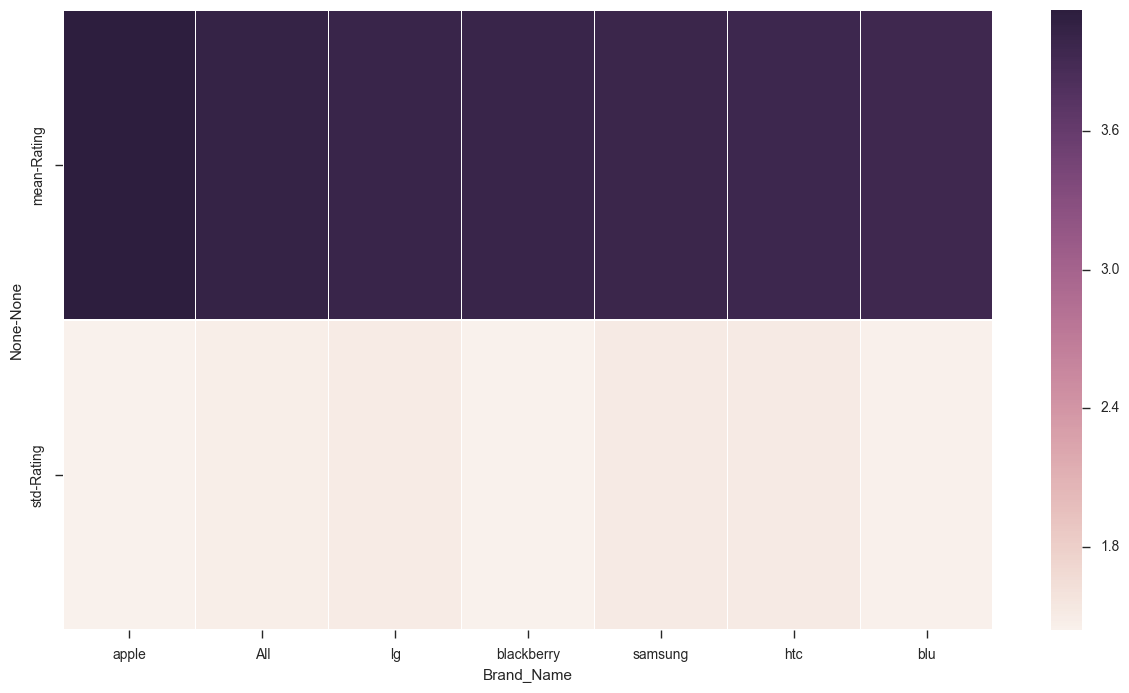

In [261]:
#Average ratings for top 5 brands
cmap = sns.cubehelix_palette(start = 1.5, rot = 1.5, as_cmap = True)
plt.subplots(figsize = (15, 8))
sns.heatmap(pivot.T,linewidths=0.2,xticklabels=True, yticklabels=True)

In [266]:
top_5_brands = top_5_brands.reset_index()
tt_brand = data_5['Brand_Name']
tt_brand2 = tt_brand.reset_index()
top_5_brand_list = list(set(tt_brand2['Brand_Name']))
#top_5_brand_list.remove('A)

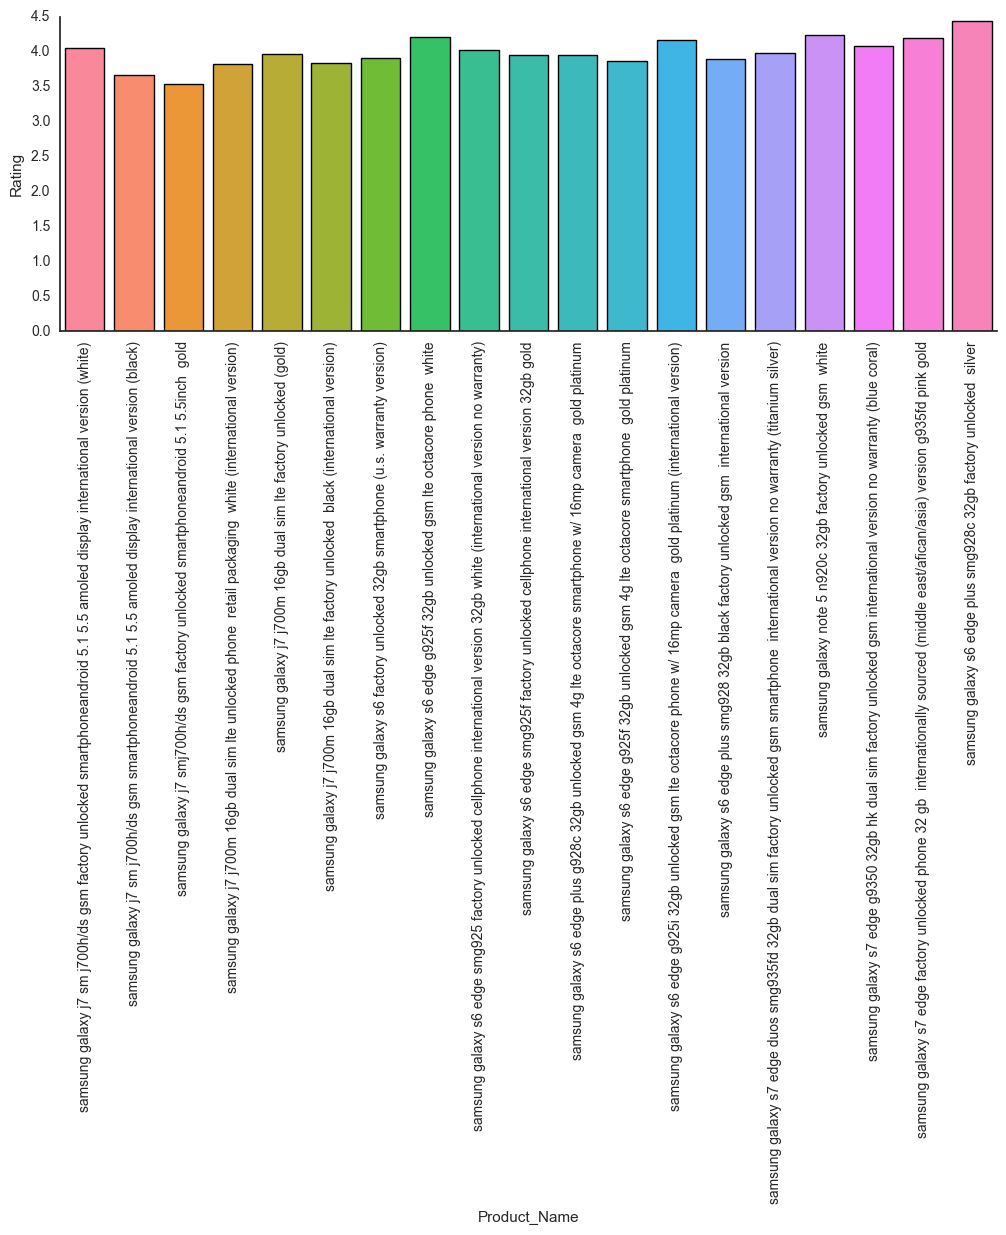

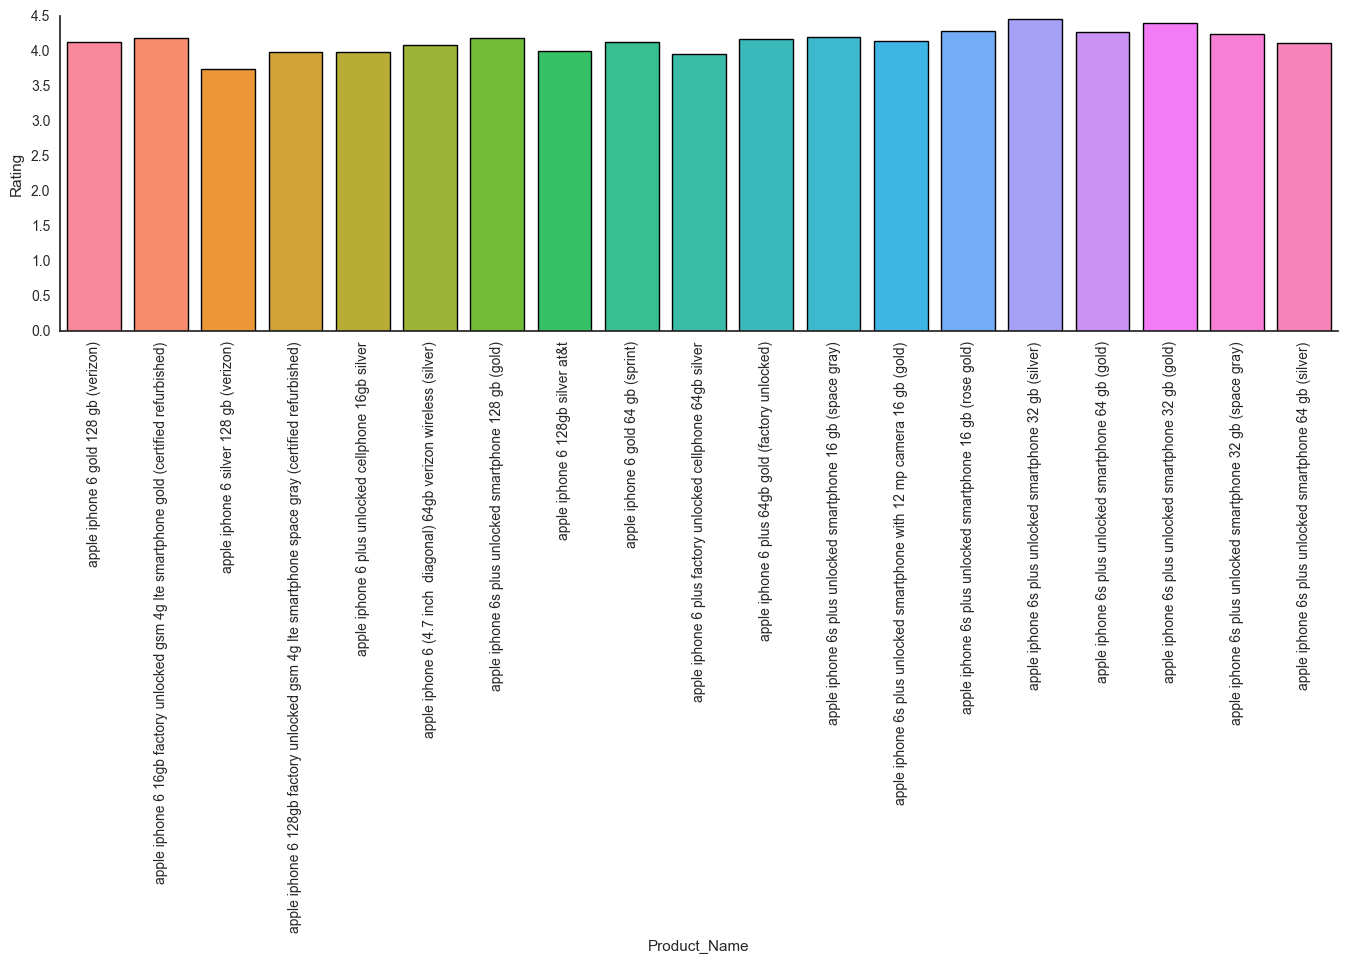

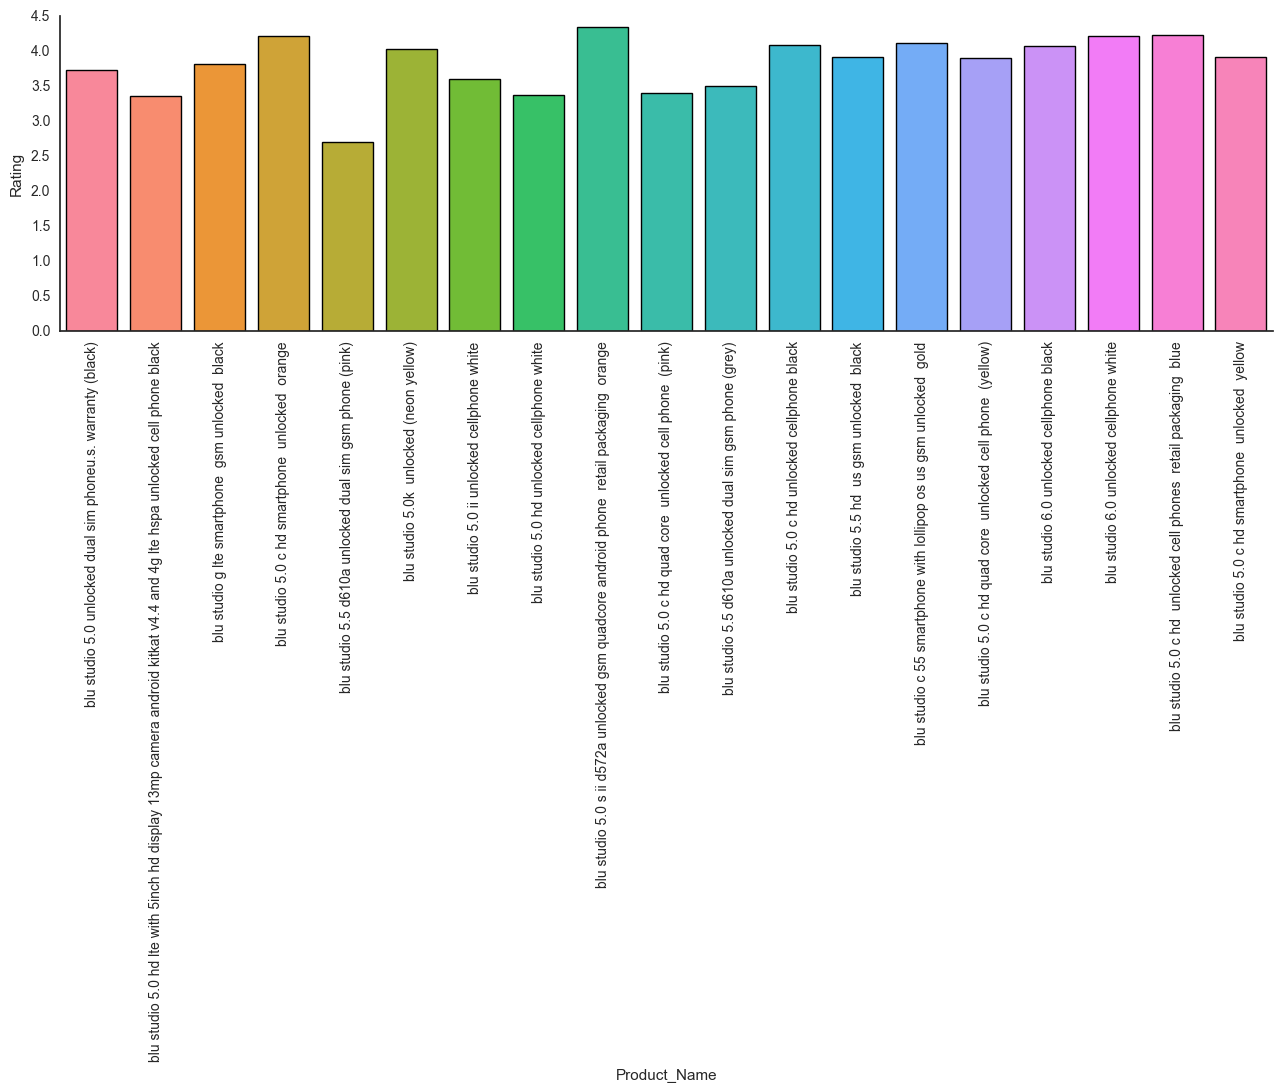

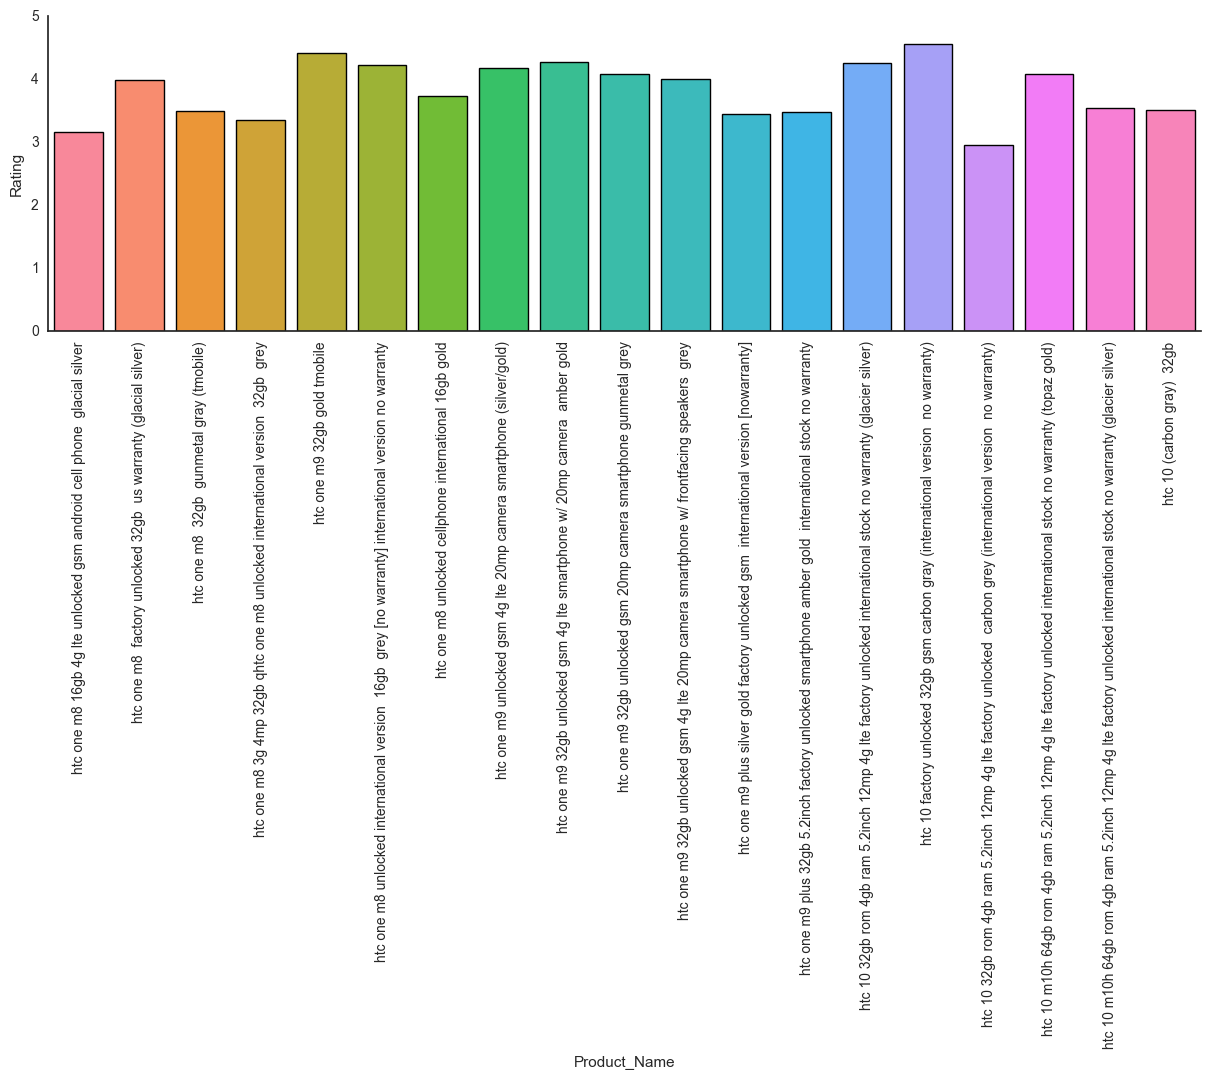

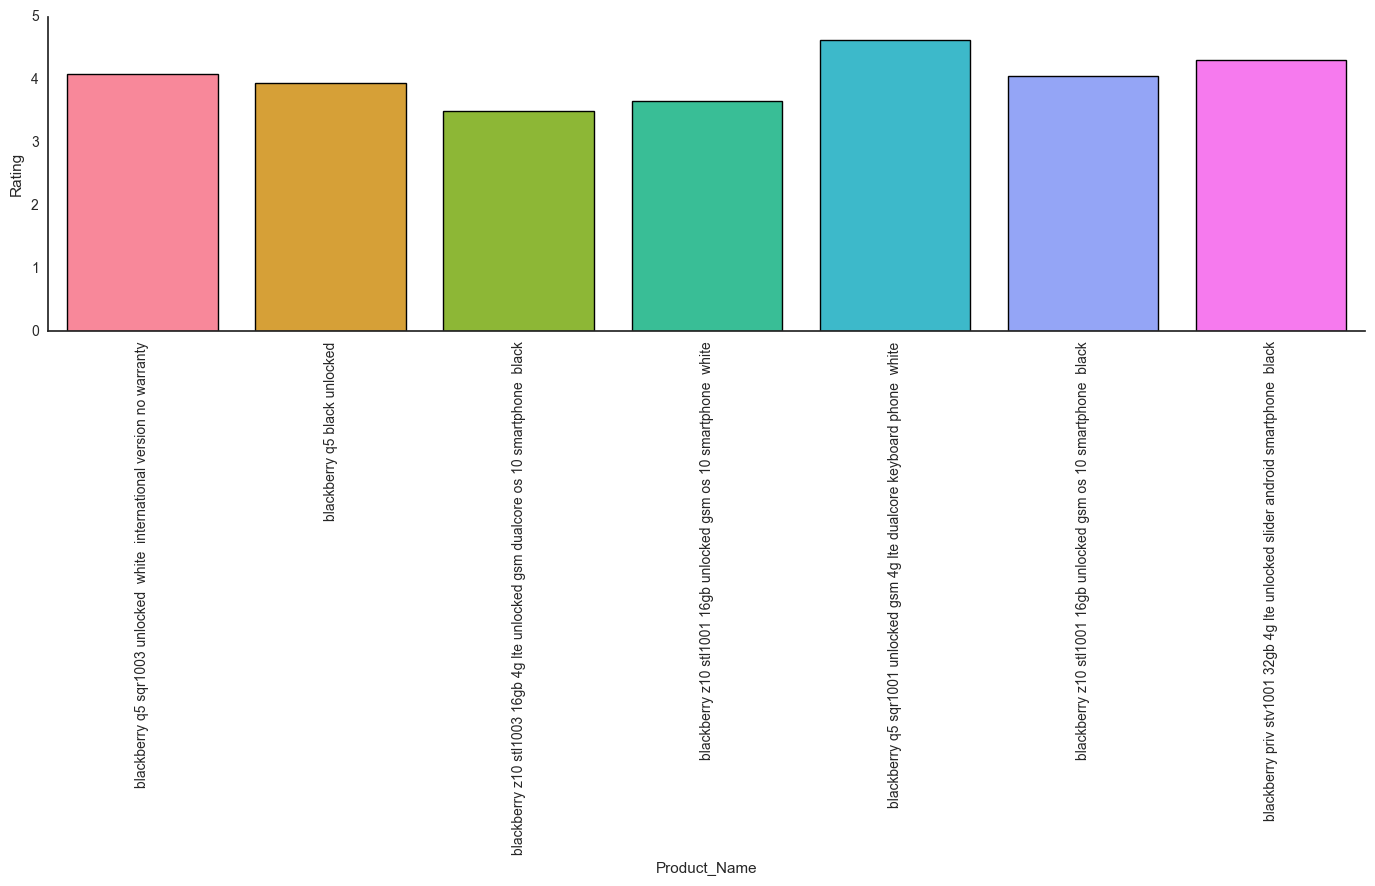

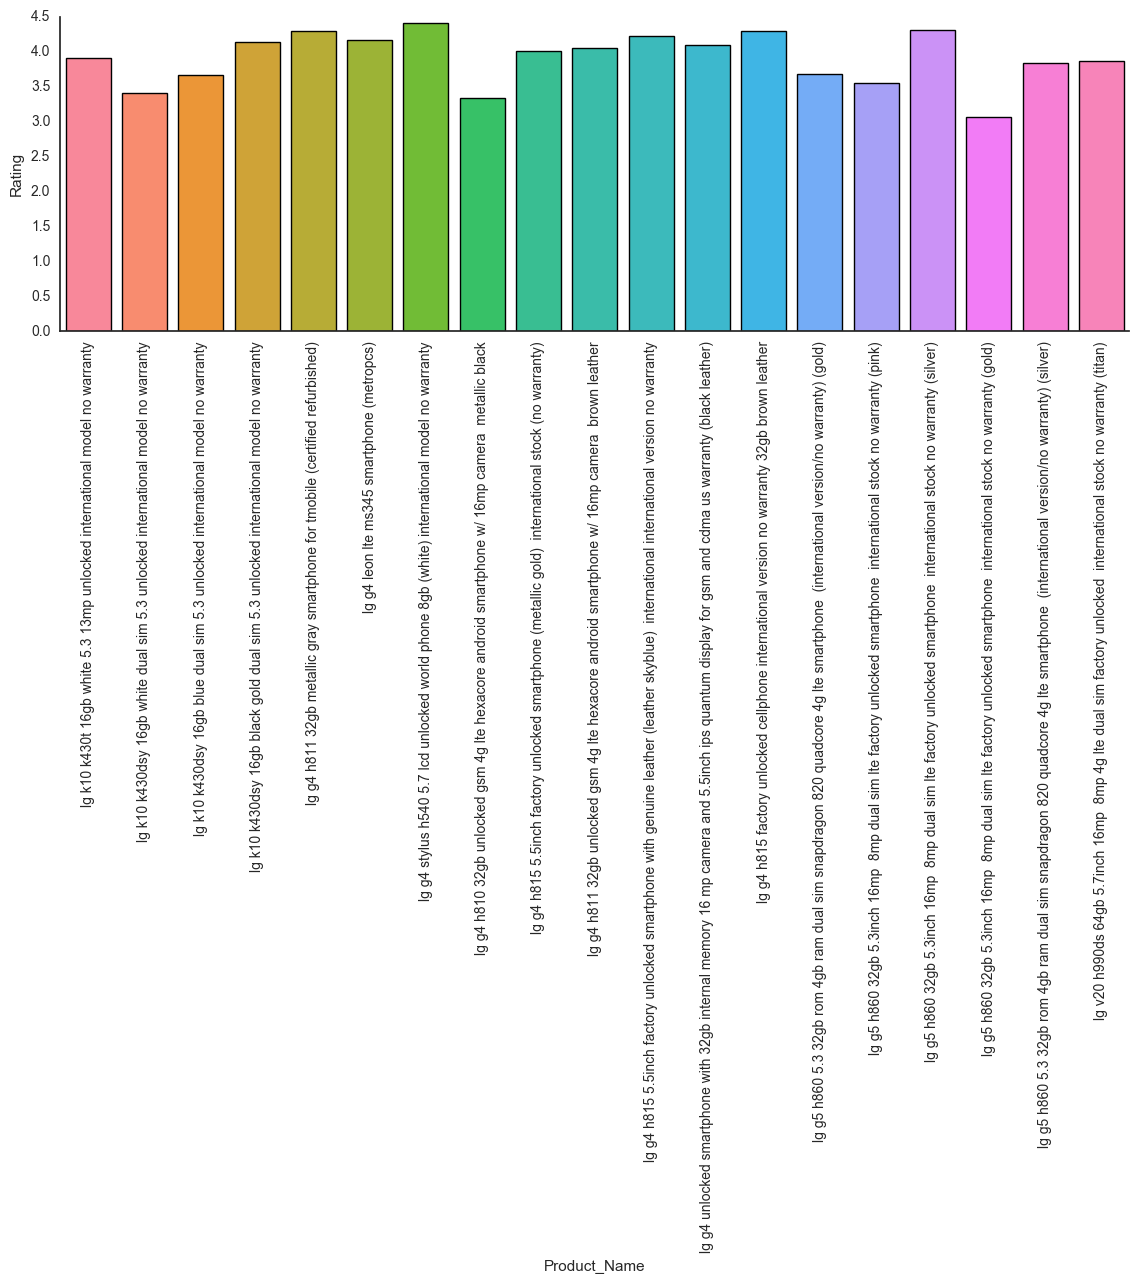

In [280]:
def plot_one_company(company, n=20):
    df_one_company = data_5.loc[data_5['Brand_Name'].isin([company])]
    pivot = pd.pivot_table(df_one_company,
            values = ['Rating', 'Review_Votes'],
            index =  ['Product_Name'],
                       columns= [],
                       aggfunc=[np.sum, np.mean, np.count_nonzero, np.std], 
                       margins=True, fill_value=0).sort_values(by=('count_nonzero', 'Rating'), ascending=False).fillna('')
    top_5_prods = pivot.reindex().head(n=20)
    top_5_prods = top_5_prods.reset_index()
    tt_prods = top_5_prods['Product_Name']
    tt_prods2 = tt_prods.reset_index()
    top_5_prods_list = list(set(tt_prods2['Product_Name']))
    #top_5_prod_list

    try:
        aa= df_one_company[df_one_company['Product_Name'].isin(top_5_prods_list)]
        g = sns.factorplot(x='Product_Name', 
                           y='Rating',
                           data=aa, 
                           saturation=1, 
                           kind="bar", 
                           ci=None, 
                           aspect=4, 
                           linewidth=1) 
        locs, labels = plt.xticks()
        plt.setp(labels, rotation=90)
    except: 
        pass
        
for i in top_5_brand_list:
    plot_one_company(i, 20)
    

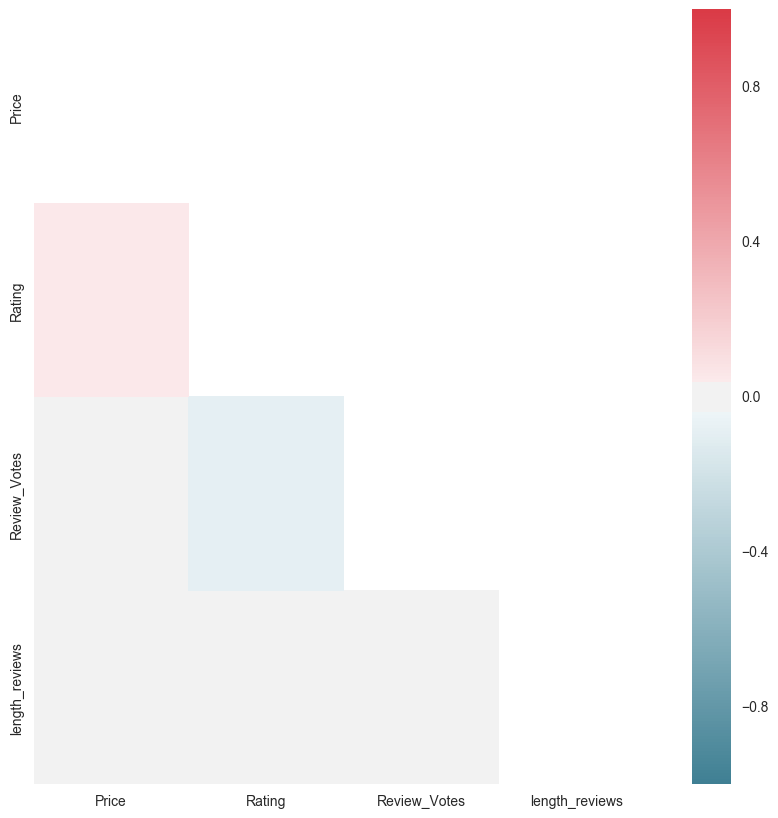

In [271]:
#Correlations

def heat_map(corrs_mat):
    sns.set(style="white")
    f, ax = plt.subplots(figsize=(10, 10))
    mask = np.zeros_like(corrs_mat, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True 
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)

variable_correlations = data_5.corr()
#variable_correlations
heat_map(variable_correlations)

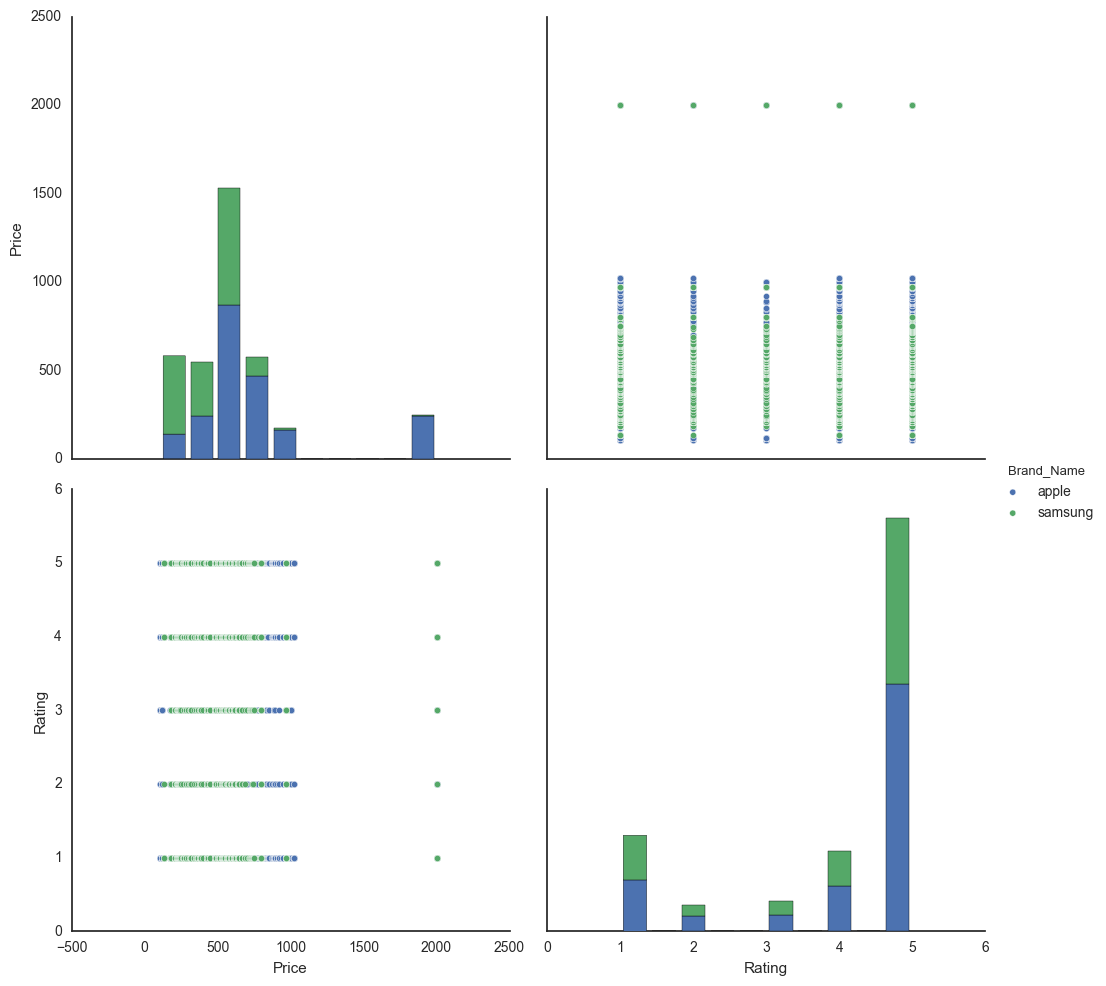

In [272]:
#Who is charging more? Apple or samsung
apple_samsumg = ['apple', 'samsung']
df_top_ten = df.loc[df['Brand_Name'].isin(apple_samsumg)]
df_small = df_top_ten[['Brand_Name', 
               'Price', 
               'Rating'
              ]]
sns.pairplot(df_small, hue='Brand_Name', size=5)

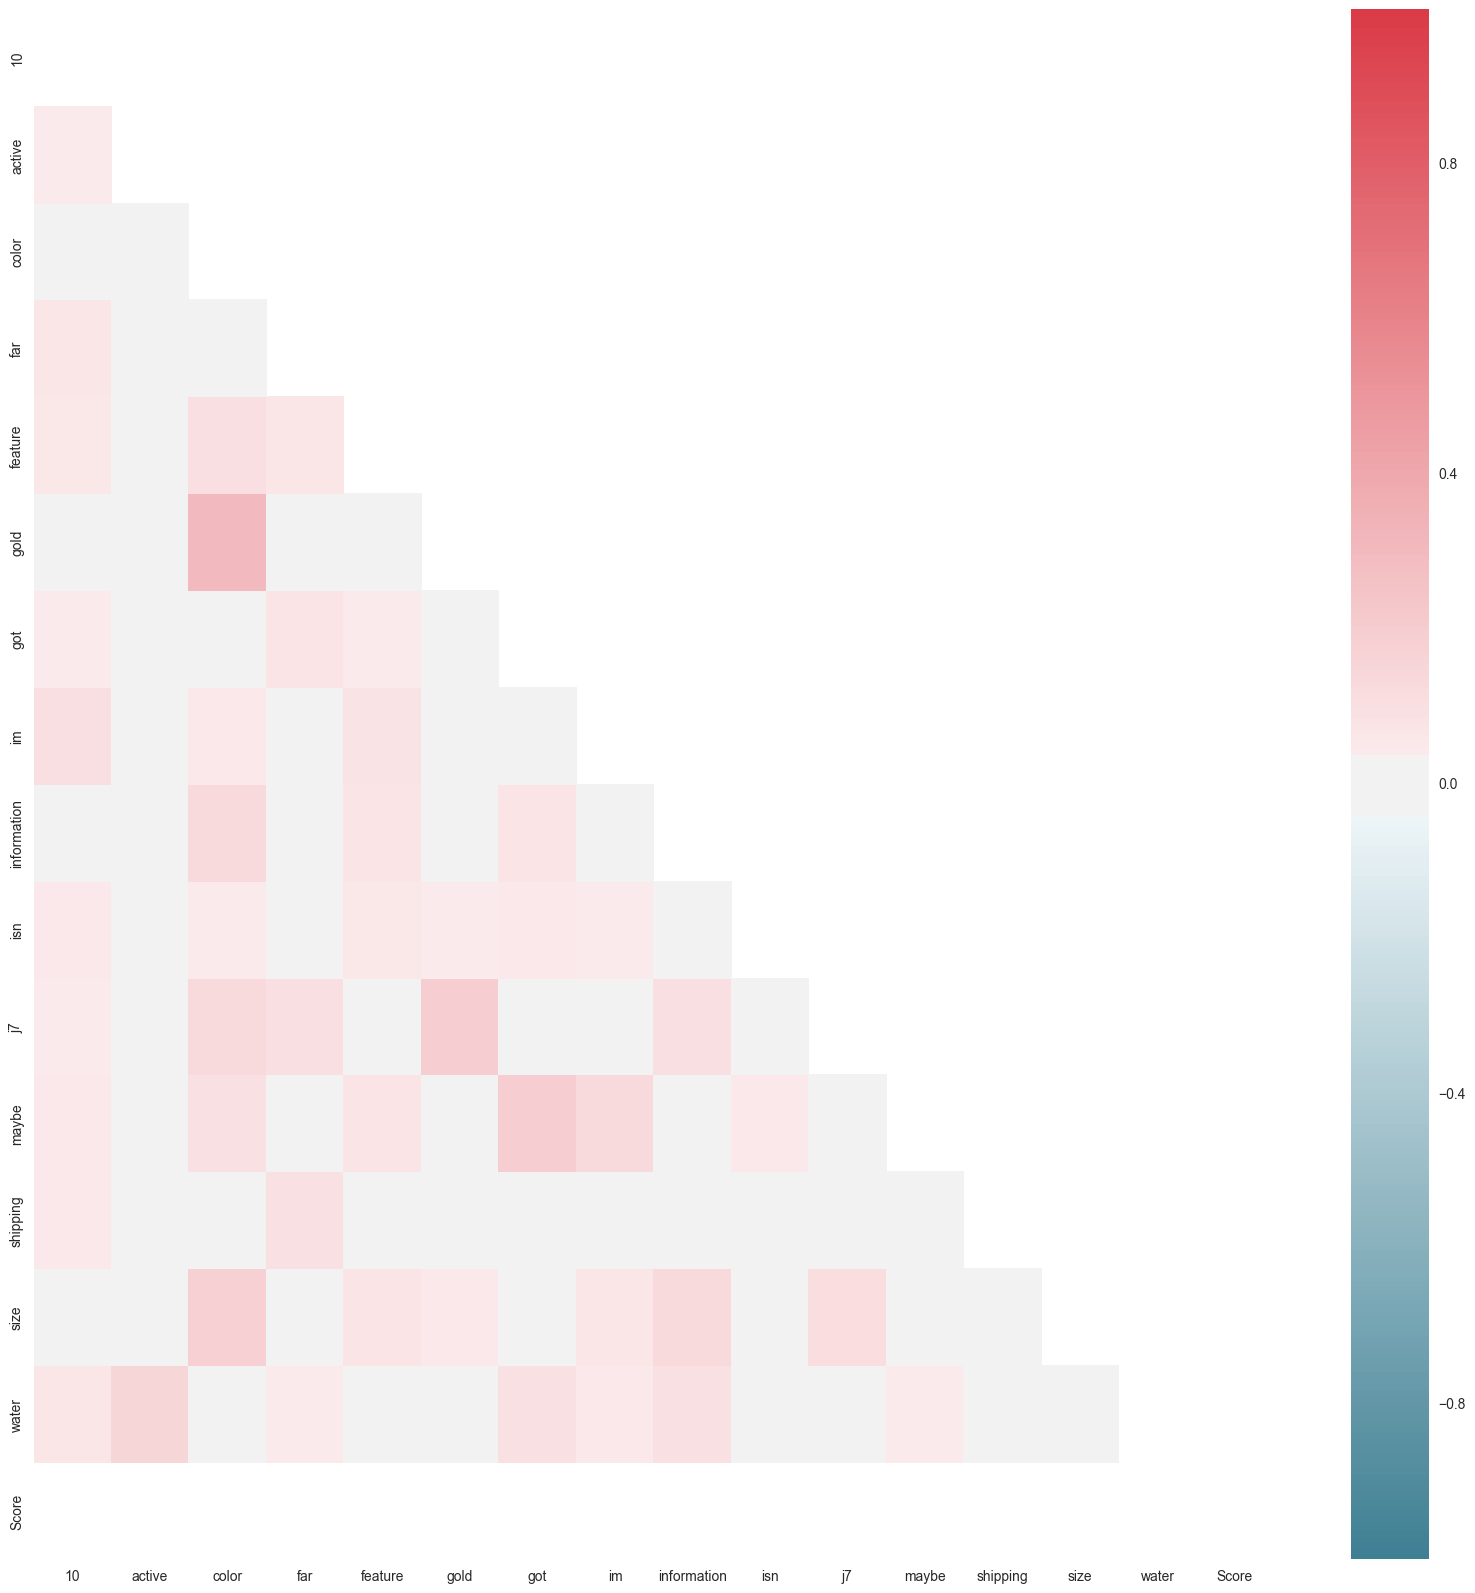

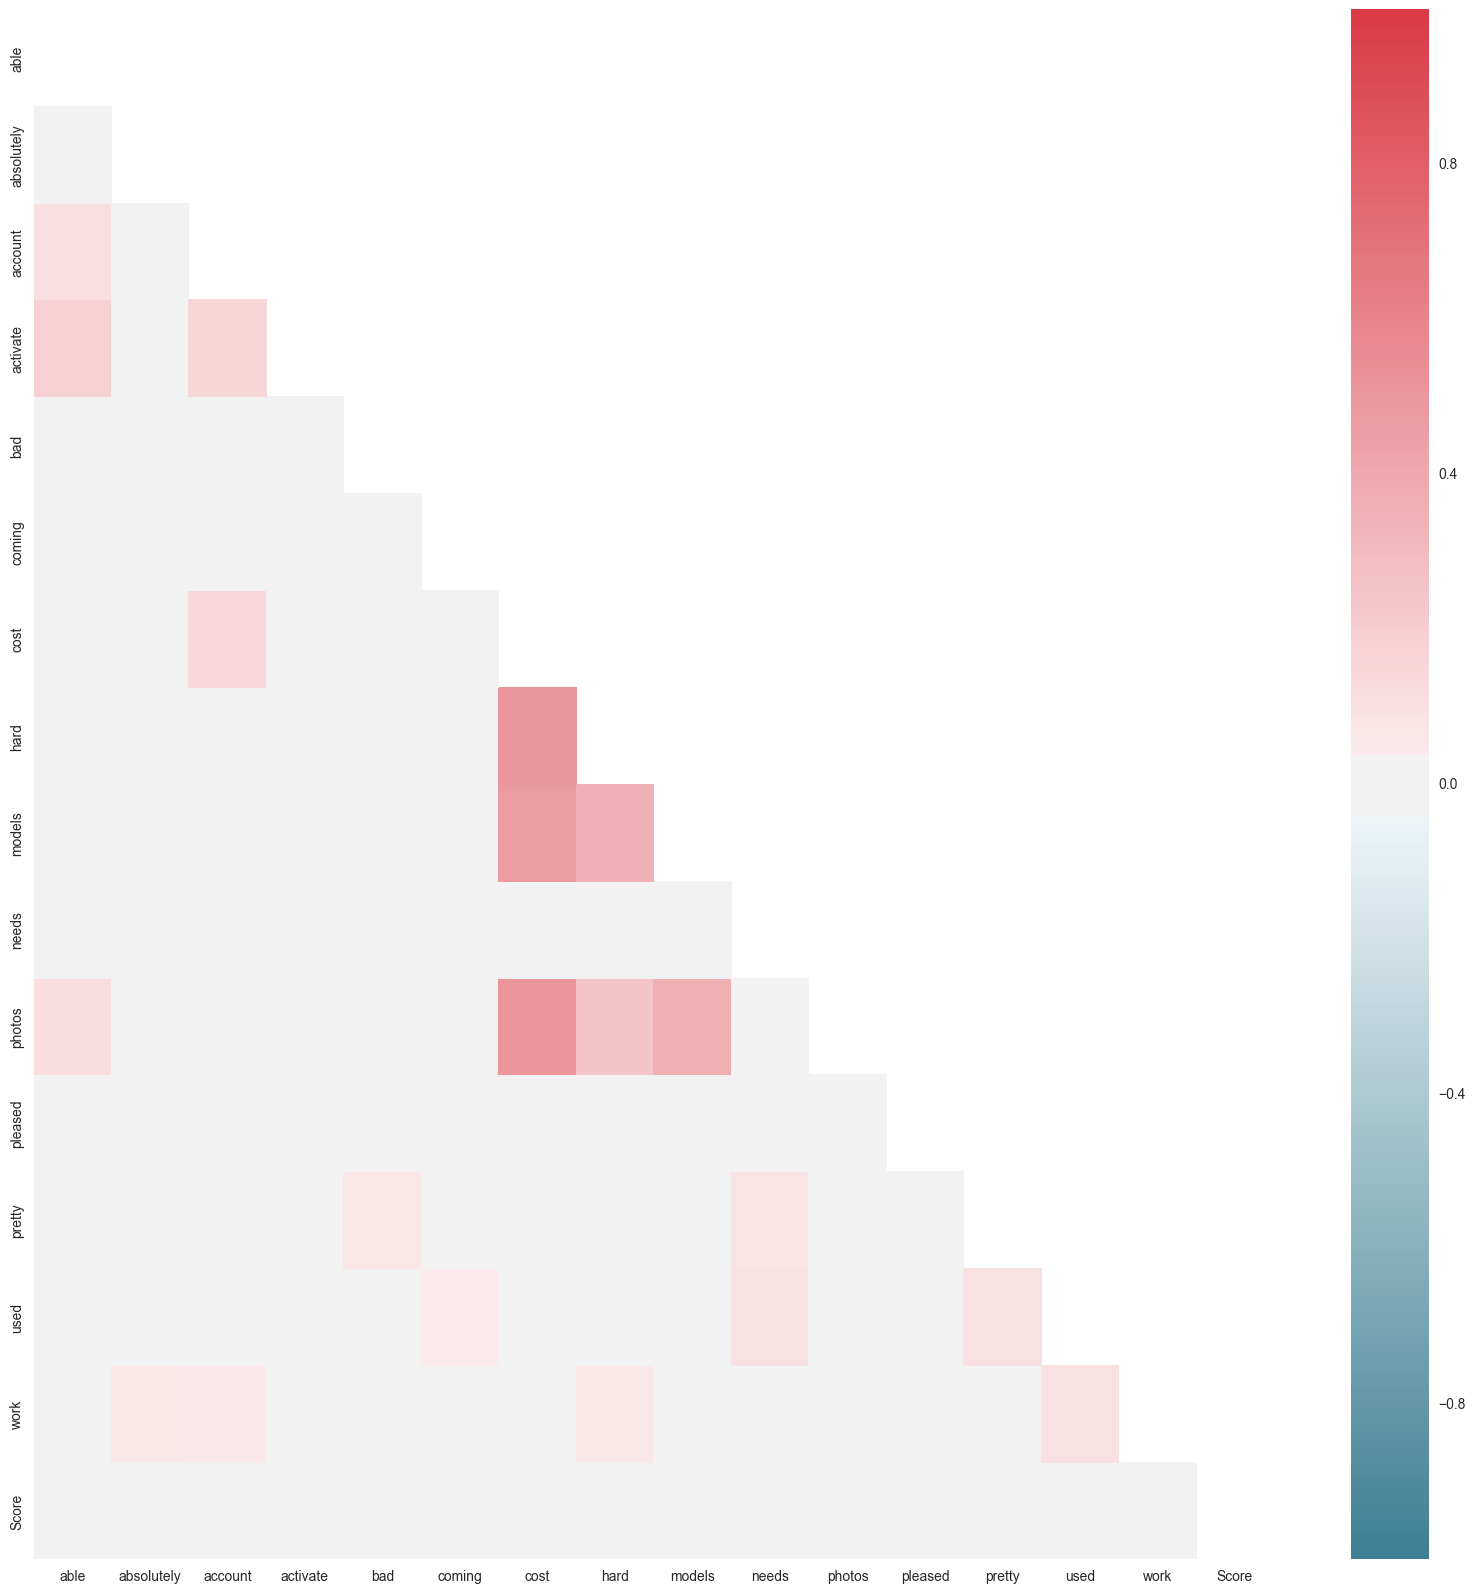

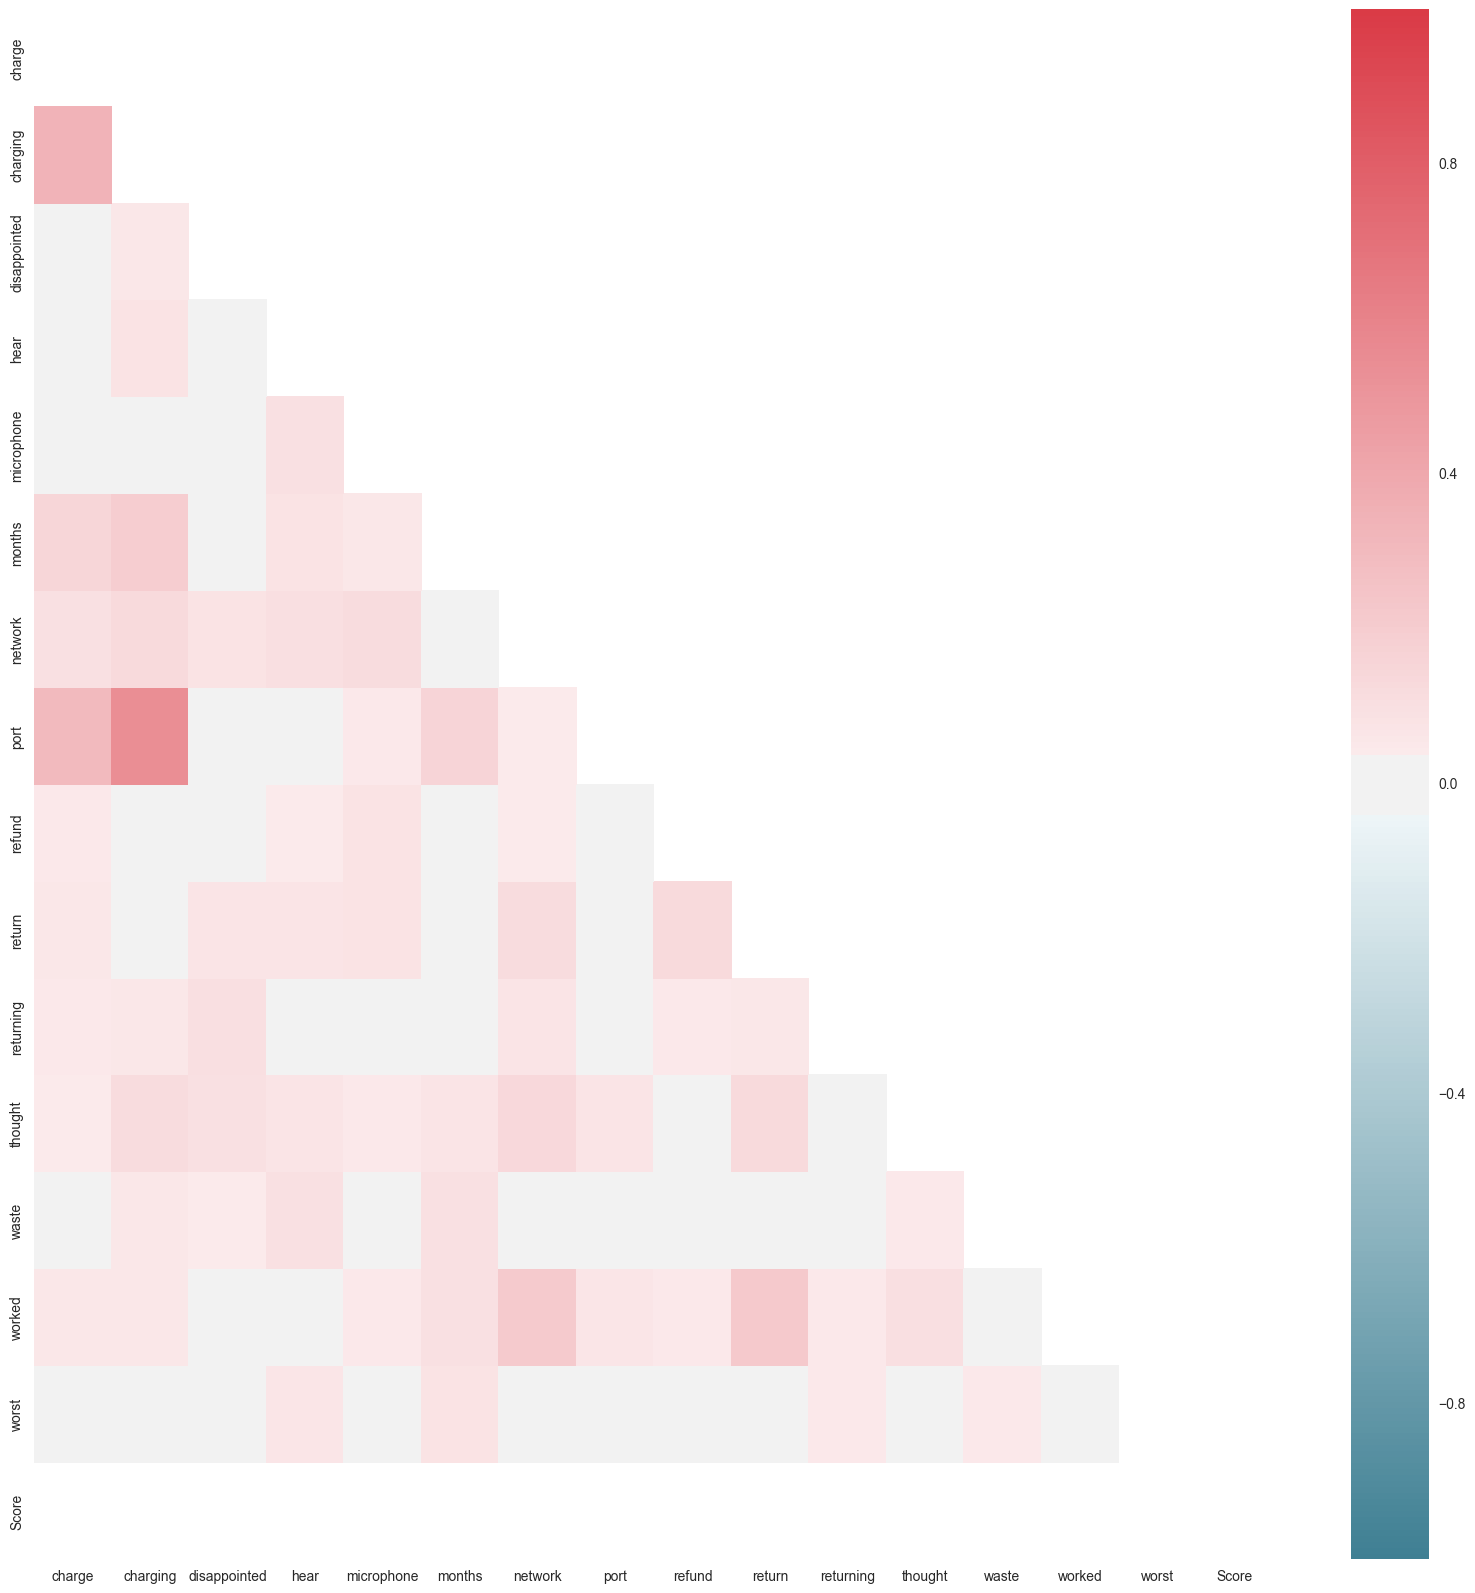

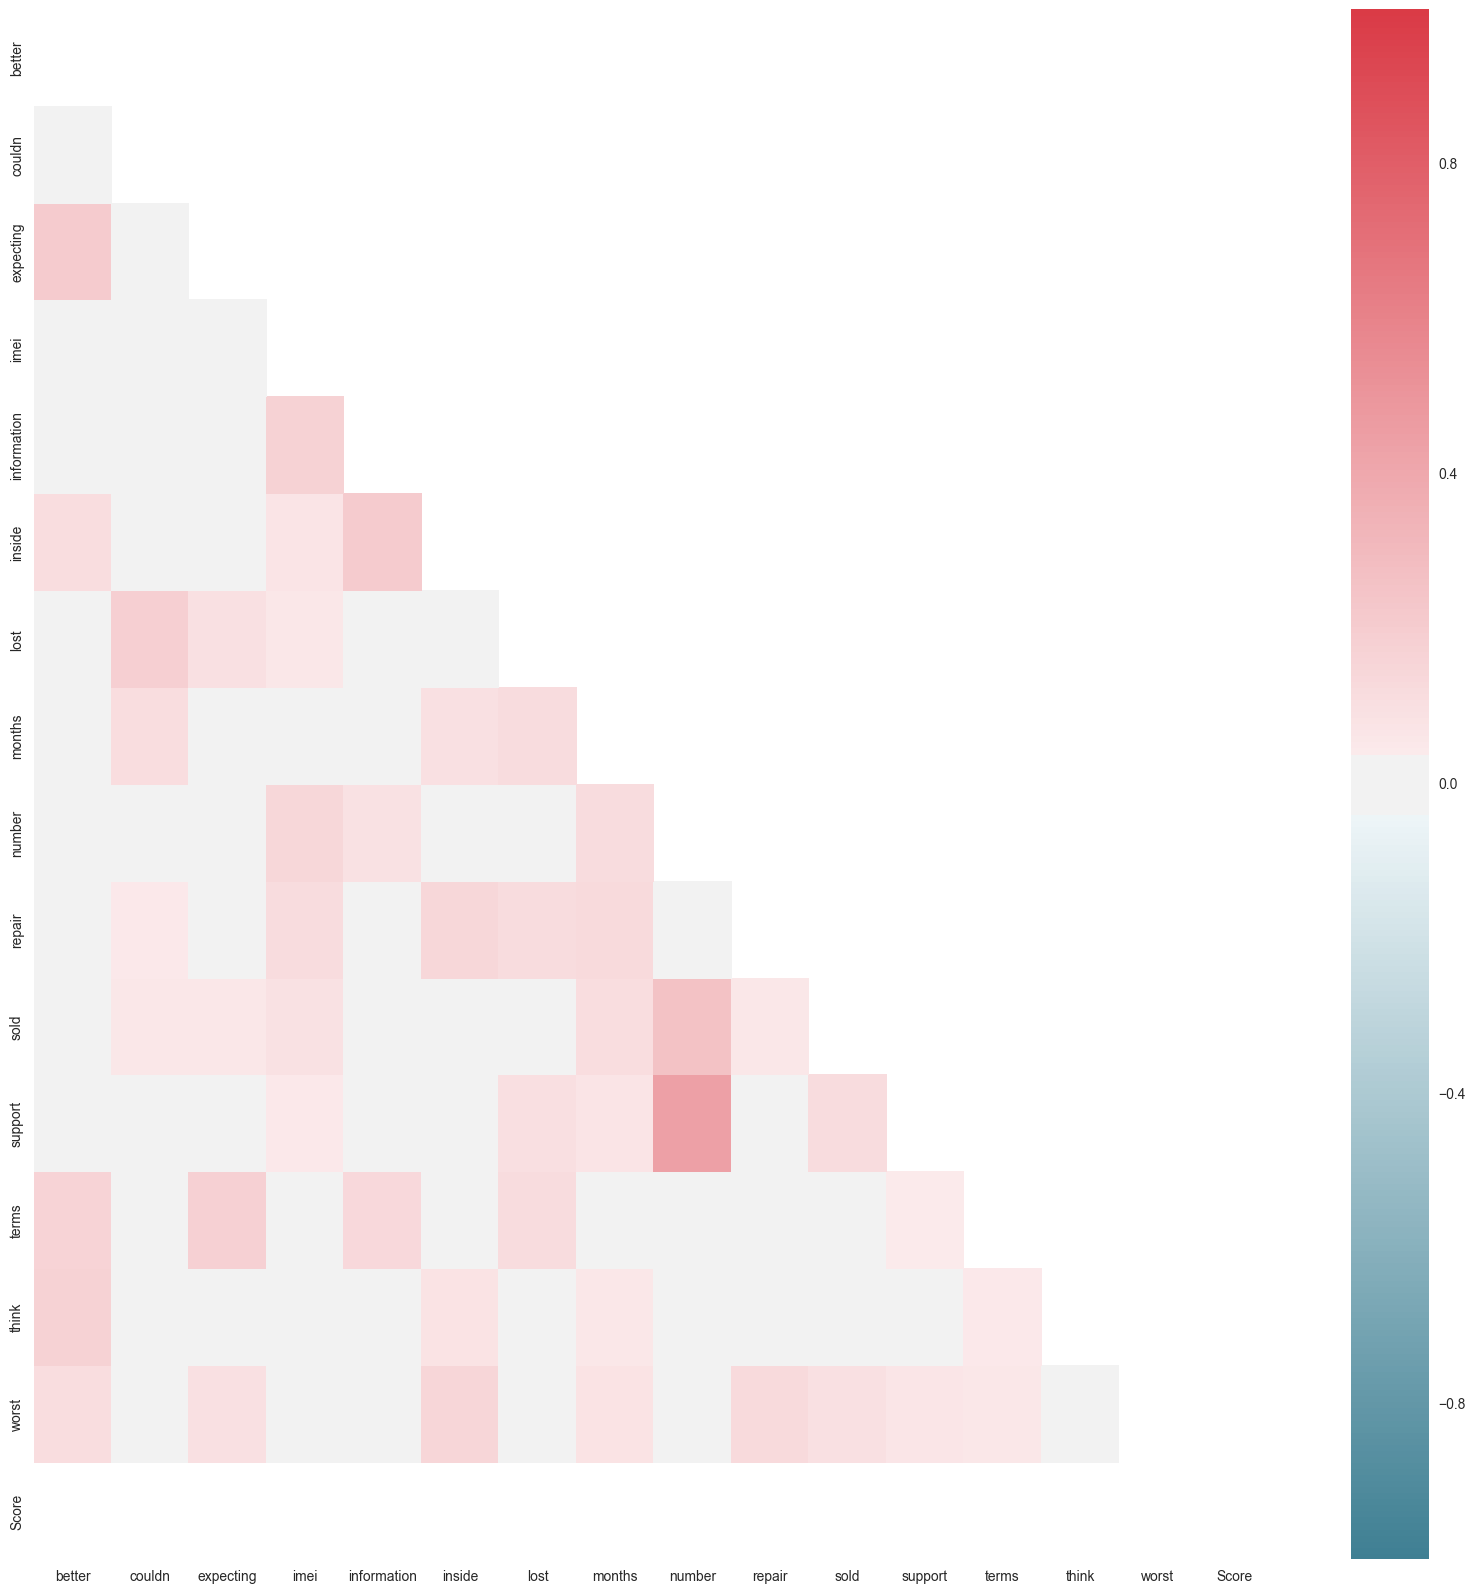

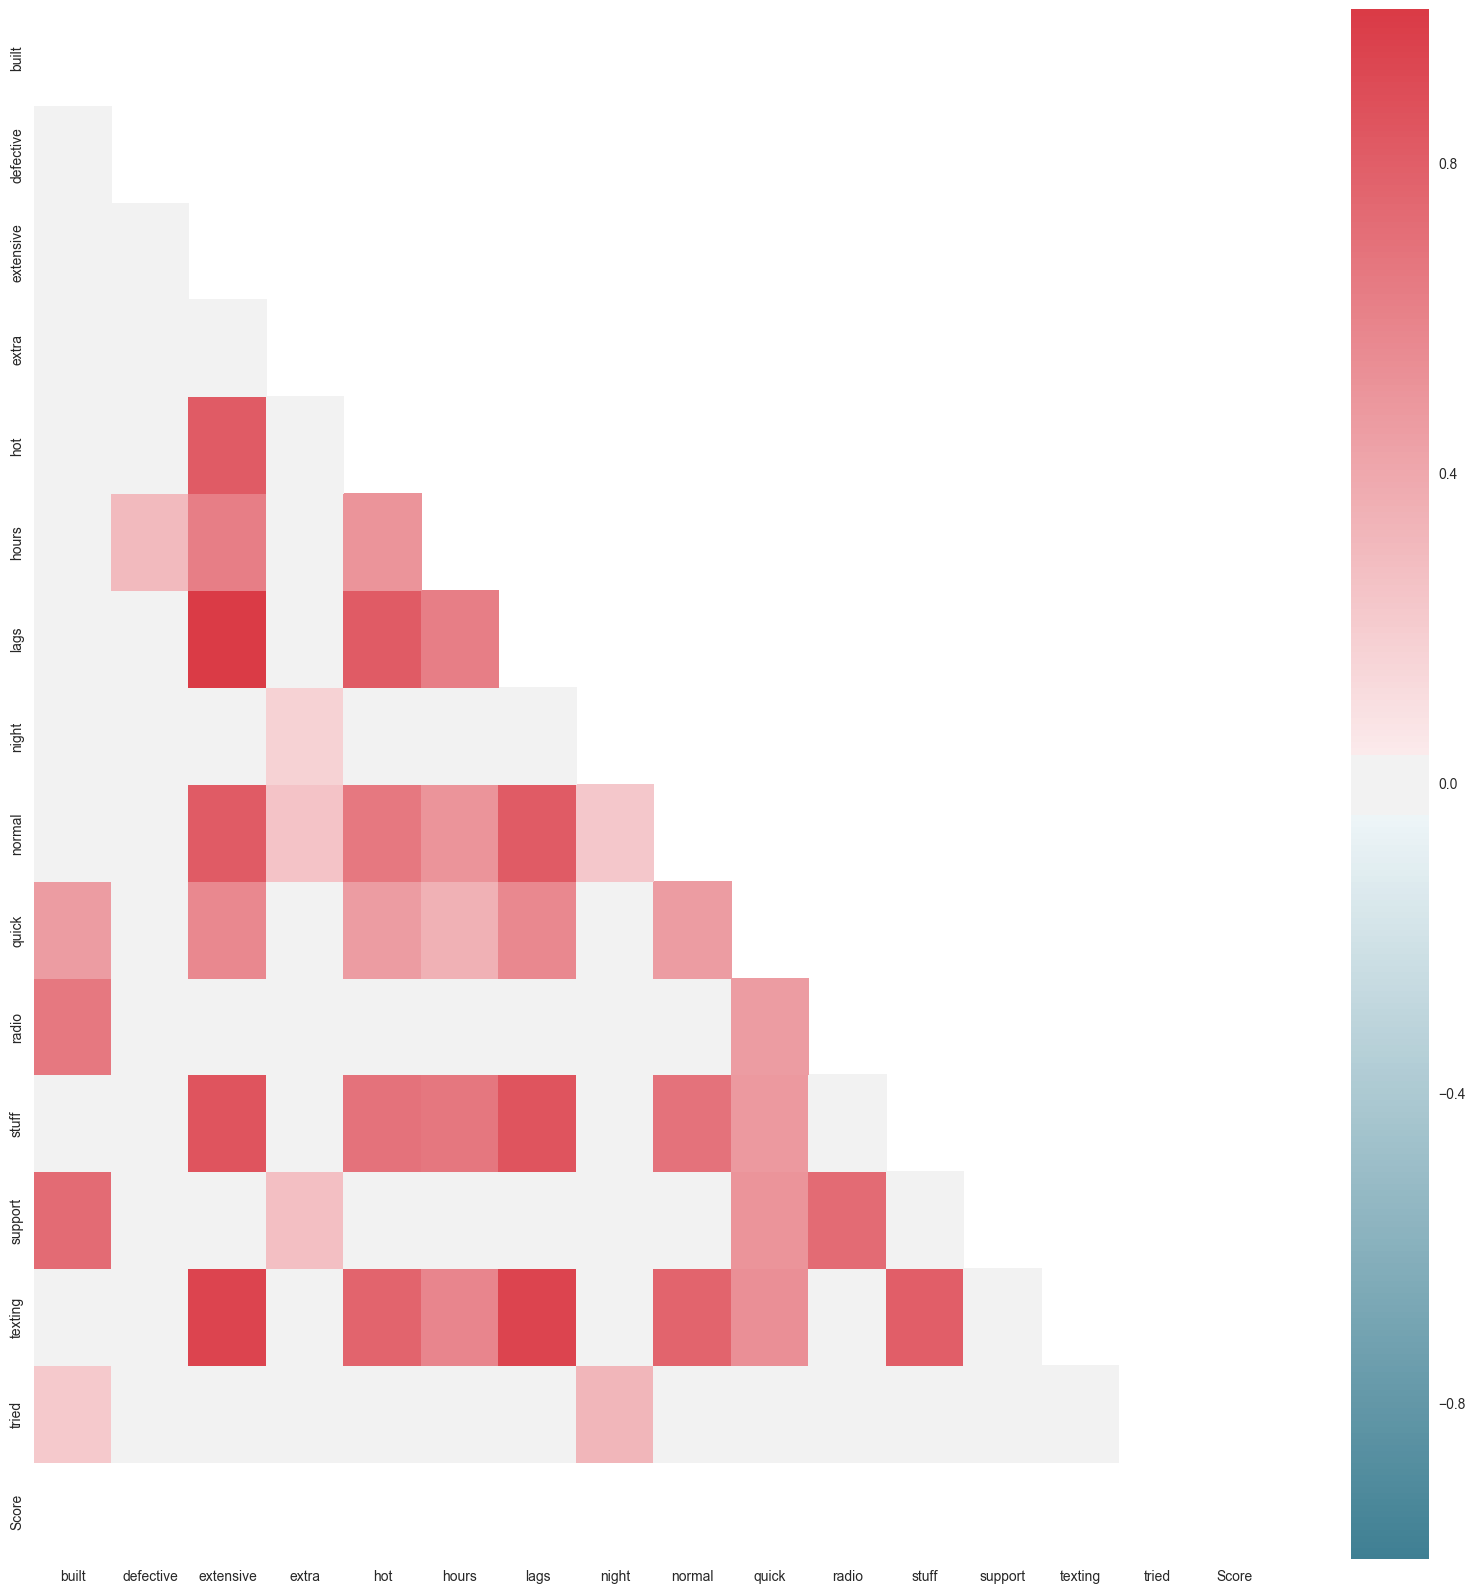

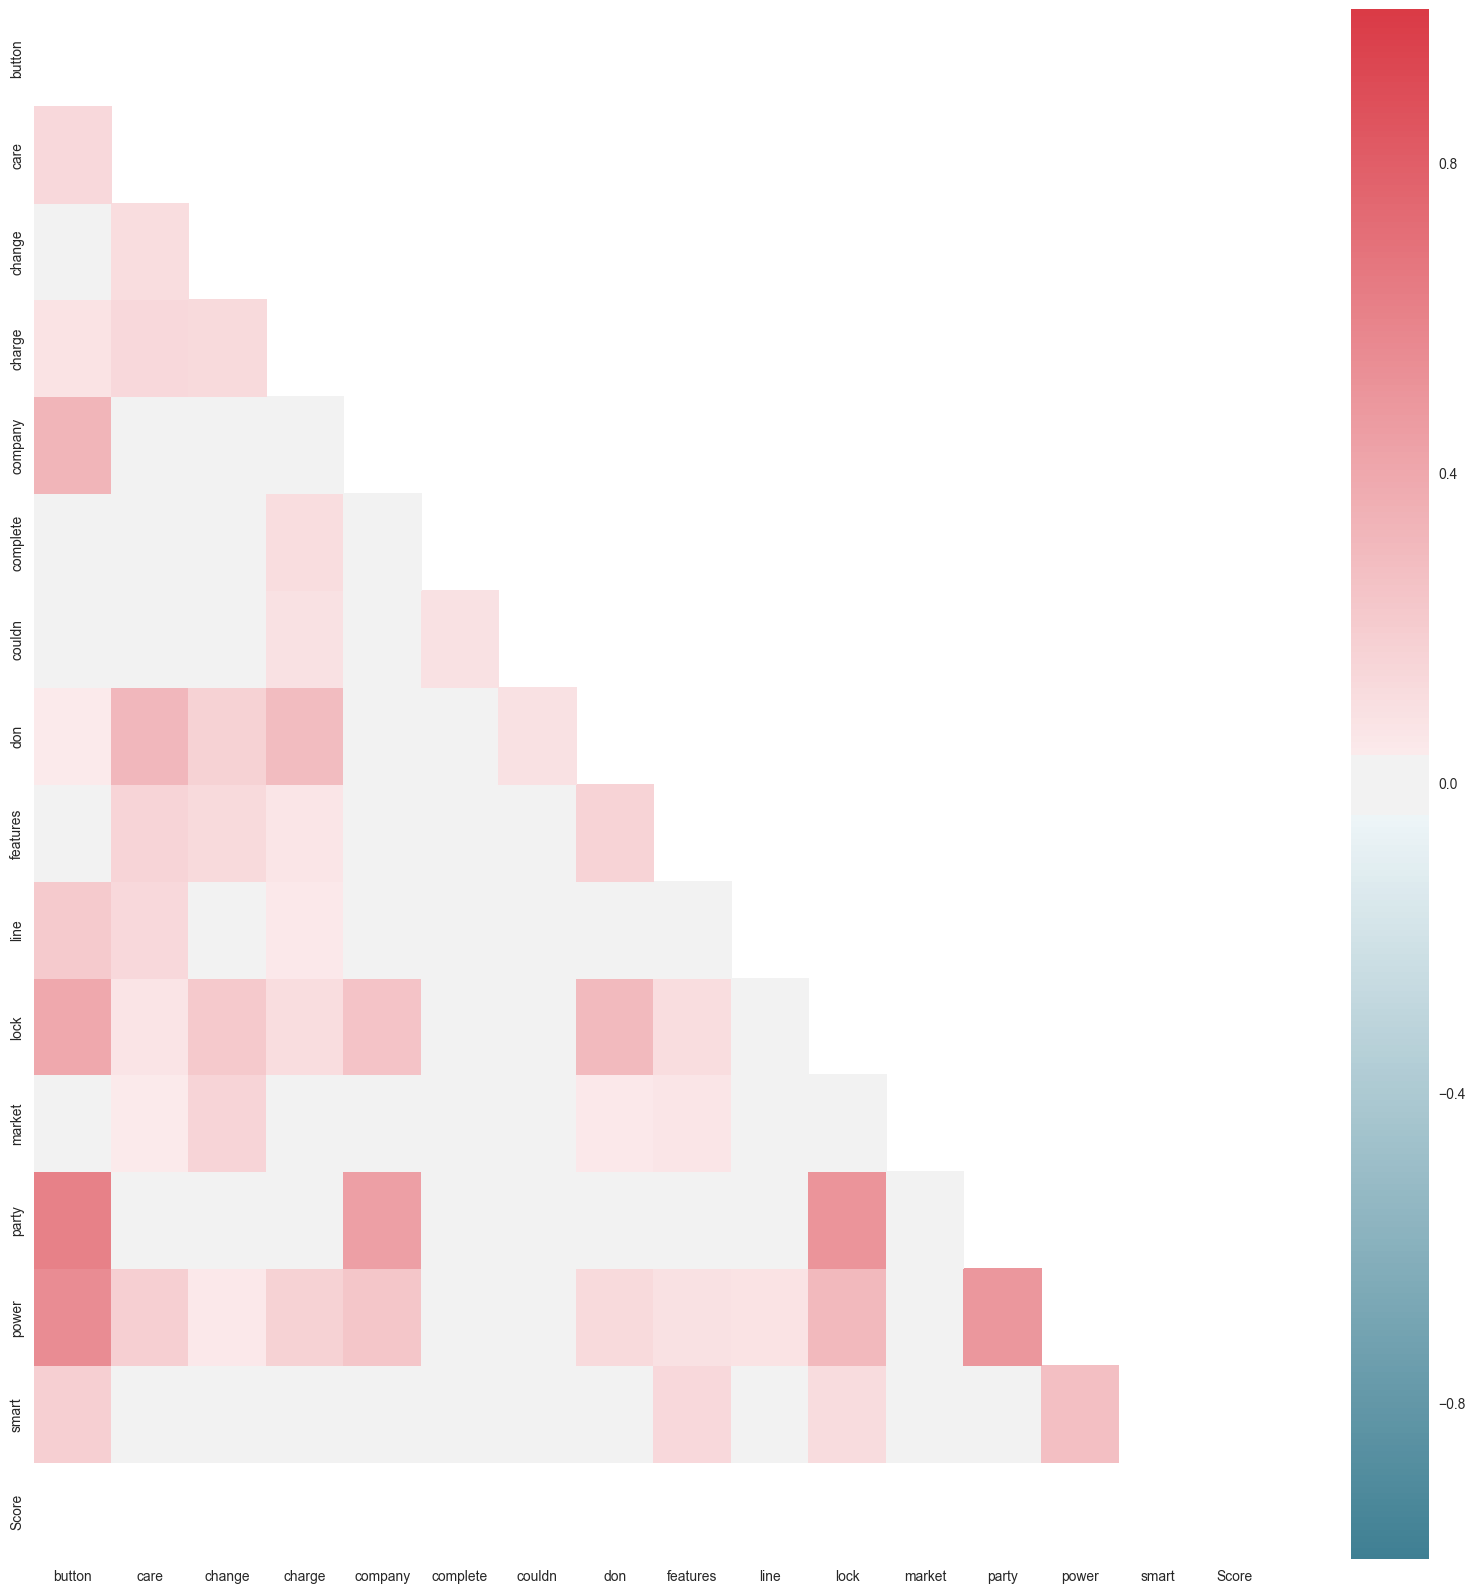

In [277]:
#K Mean clustering use to find out important words in top ten Brands
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_selection import SelectKBest

def find_correlations_one_brand(company):
    df_one_company = df.loc[df['Brand_Name'].isin([company])]
    def corr_matrix_of_important_words(term_doc_mat, word_list, scores, n_features_to_keep):
        selector = SelectKBest(k=n_features_to_keep).fit(term_doc_mat, scores)
        informative_words_index = selector.get_support(indices=True)
        labels = [word_list[i] for i in informative_words_index]
        data = pd.DataFrame(term_doc_mat[:,informative_words_index].todense(), columns=labels)
        data['Score'] = df_one_company.Rating
        return(data.corr())

    def heat_map(corrs_mat):
        sns.set(style="white")
        f, ax = plt.subplots(figsize=(20, 20))
        mask = np.zeros_like(corrs_mat, dtype=np.bool)
        mask[np.triu_indices_from(mask)] = True 
        # Generate a custom diverging colormap
        cmap = sns.diverging_palette(220, 10, as_cmap=True)
        sns.heatmap(corrs_mat, mask=mask, cmap=cmap, ax=ax)
    vectorizer = CountVectorizer(max_features = 500, stop_words='english')
    term_doc_mat = vectorizer.fit_transform(df_one_company.Reviews_text.values.astype('U'))
    word_list = vectorizer.get_feature_names()

    corrs_large = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 60)
    #print(corrs_large.Score.sort_values(inplace=False)[:-1])
    corrs_small = corr_matrix_of_important_words(term_doc_mat, word_list, df_one_company.Rating, 15)
    heat_map(corrs_small)

for item in top_5_brand_list:
    print (item)
    find_correlations_one_brand(item)